In [1]:
import sys
sys.path.append("..")

In [2]:
from files.utils import empty_lists, pie_plot, word_cloud, bar_plot, final_importer
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [3]:
final_df = final_importer()

post_id = []
label = []
toxicity = []
target = []
rationales = []
post = []

for value in final_df:
    post_id.append(value['post_id'])
    label.append(value['label'])
    toxicity.append(value['toxicity'])
    target.append(value['target'])
    rationales.append(value['rationales'])
    post.append(value['post'])

final = {
    'post_id': post_id,
    'label': label,
    'toxicity': toxicity,
    'target': target,
    'rationales': rationales,
    'posts': post
}
final_table = pd.DataFrame(data = final)
final_table

,post_id,label,toxicity,target,rationales,posts
0,1179055004553900032_twitter,normal,non-toxic,[None],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",i dont think im getting my baby them white 9 h...
1,1179063826874032128_twitter,normal,non-toxic,[None],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",we cannot continue calling ourselves feminists...
2,1179088797964763136_twitter,hatespeech,toxic,[Asian],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",i am bit confused coz chinese ppl can not acce...
3,1179085312976445440_twitter,hatespeech,toxic,"[Women, Caucasian]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",this bitch in whataburger eating a burger with...
4,13851720_gab,hatespeech,toxic,[Jewish],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, ...",laura loomer raped me while screaming at me in...
...,...,...,...,...,...,...
15124,9988840_gab,offensive,toxic,[Women],"[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",this vile racist ghetto ass dumber than a reta...
15125,9989999_gab,offensive,toxic,"[Women, Men]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, ...",if ur still on twitter tell carlton i said his...
15126,9990225_gab,offensive,toxic,[African],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...",when i first got on here and said i hate trump...
15127,9992513_gab,hatespeech,toxic,"[Asian, Hispanic]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, ...",it is awful look at world demographics asians ...


In [4]:
# Total number of rows:
print(f"Total number of rows in the dataset: {len(final_table)}")

Total number of rows in the dataset: 15129


## Missing Values Identification

In [5]:
# Check for missing values
vars = ['post_id', 'label', 'toxicity', 'posts']
for missing in vars:
    empties = final_table[missing].isnull().sum()
    print(f"Total number of rows with empty {missing}: {empties}")

empty_target = empty_lists(final_table, 'target')
print(f"Total number of rows with empty target lists: {empty_target}")

empty_rationales = empty_lists(final_table, 'rationales')
print(f"Total number of rows with empty rationales lists: {empty_rationales}")

Total number of rows with empty post_id: 0
Total number of rows with empty label: 0
Total number of rows with empty toxicity: 0
Total number of rows with empty posts: 0
Total number of rows with empty target lists: 0
Total number of rows with empty rationales lists: 0


## Pie Chart For Label Distribution

In [6]:
list = []
for label in final_table['label']:
    if label not in [None, "", 'None']:
        list.append(label)
label_counts = pd.Series(list).value_counts()
print(label_counts)

hatespeech    5935
offensive     5479
normal        3715
Name: count, dtype: int64


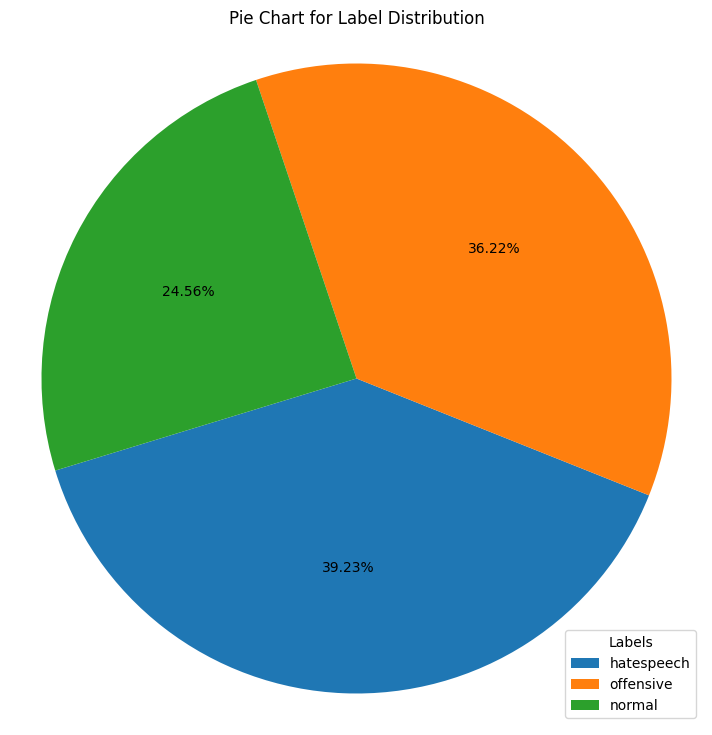

In [7]:
pie_plot(label_counts, 'Pie Chart for Label Distribution')

## Pie Chart For Toxicity Distribution

In [8]:
list = []
for toxicity in final_table['toxicity']:
    if toxicity not in [None, "", 'None']:
        list.append(toxicity)
toxicity_counts = pd.Series(list).value_counts()
print(toxicity_counts)

toxic        11414
non-toxic     3715
Name: count, dtype: int64


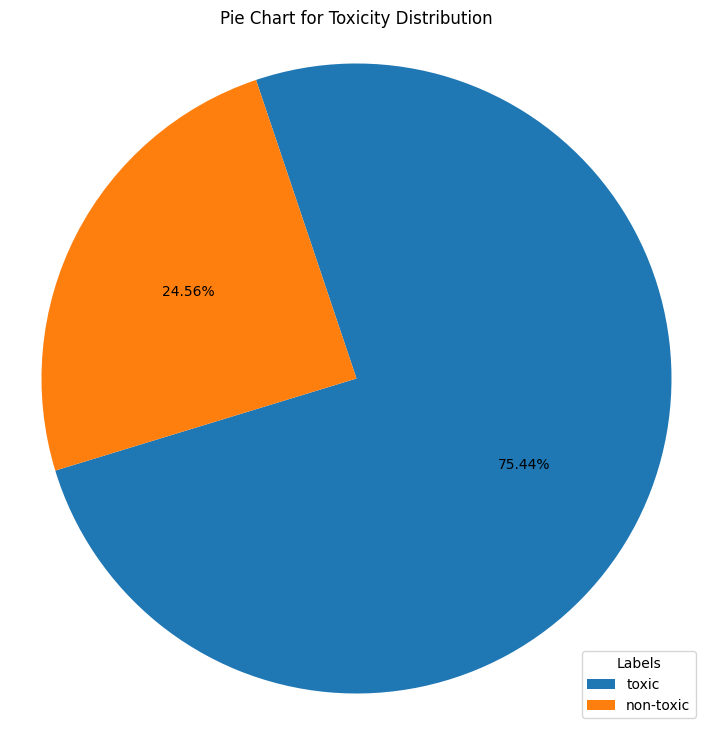

In [9]:
pie_plot(toxicity_counts, 'Pie Chart for Toxicity Distribution')

## Word Cloud For Posts Words Distribution

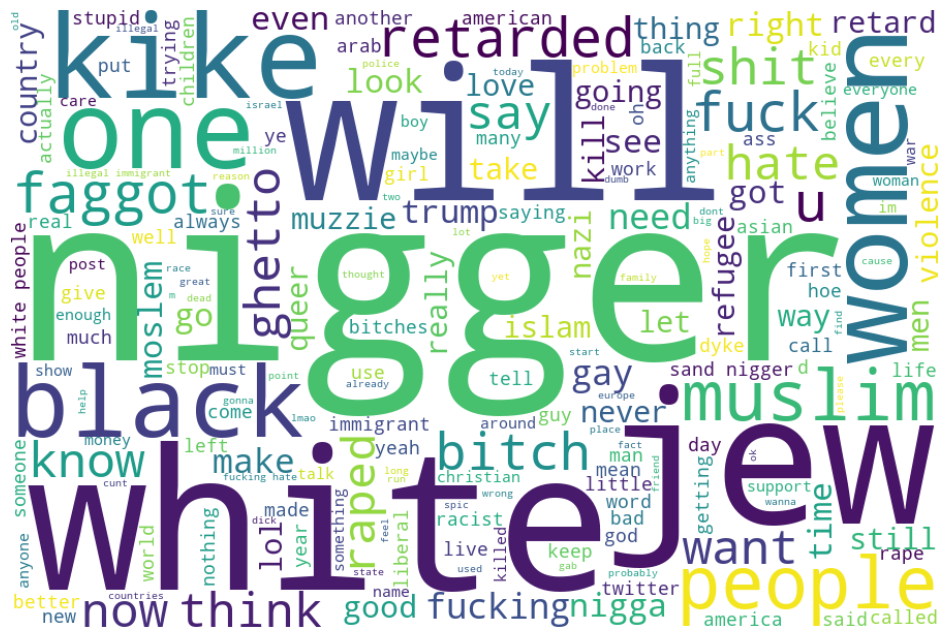

In [10]:
total_words = []
for post in final_table['posts']:
    words = post.split()
    total_words.extend(words) 
word_cloud(total_words, 56)



## Bar Chart For Target Distribution

In [11]:
list = []
for targets in final_table['target']:
    for trgt in targets:
        if trgt not in [None, "", 'None']:
            list.append(trgt)
target_distribution = pd.Series(list).value_counts()
print(target_distribution)

African       3593
Women         2718
Islam         2409
Jewish        2134
Homosexual    1840
Arab          1470
Caucasian     1028
Men           1010
Refugee        994
Hispanic       570
Asian          493
Name: count, dtype: int64


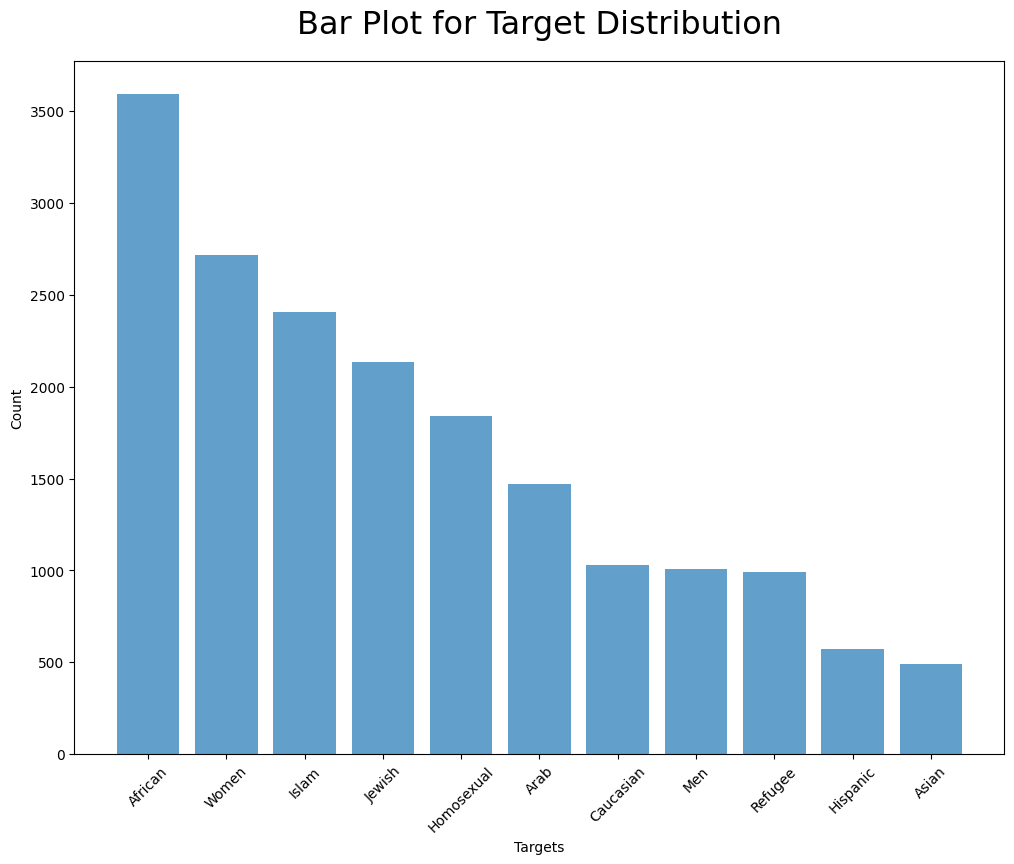

In [12]:
bar_plot(target_distribution, 'Bar Plot for Target Distribution', 'Targets')

## Bar Plot for Rationale Words Distribution

In [13]:
lst_words = []

for _, row in final_table.iterrows():
    post = row['posts'].split()
    rationales = row['rationales']
    for words, ration in zip(post, rationales):
        if ration == 1 and words not in ENGLISH_STOP_WORDS:
            lst_words.append(words)

words_counts = pd.Series(lst_words).value_counts()
print(words_counts)

nigger              1807
kike                 940
white                718
retarded             708
niggers              671
                    ... 
pills                  1
prevention             1
worldwide              1
handcuff               1
multiculturalize       1
Name: count, Length: 8328, dtype: int64


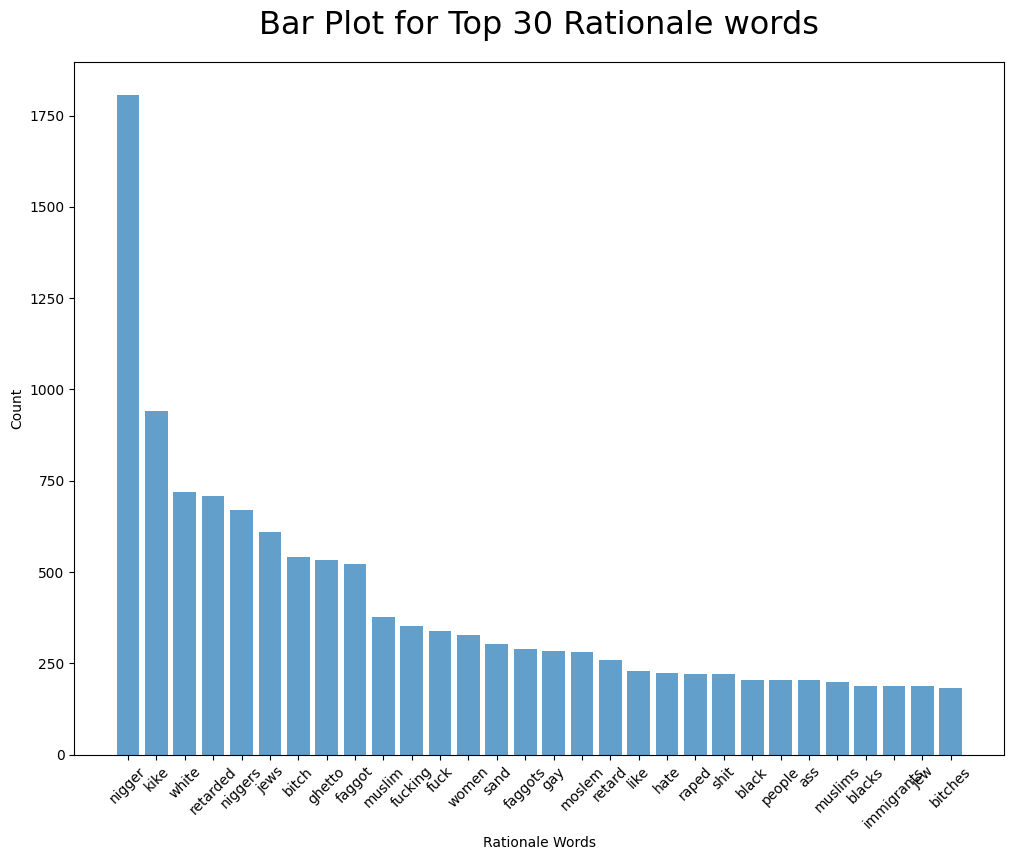

In [14]:
words = words_counts.head(30)
bar_plot(words, 'Bar Plot for Top 30 Rationale words', 'Rationale Words')